# Example of retrieving a species list for a NWR

Created on Sept 6 2018 by nmtarr

Uses Python 2.7 and the gapproduction package (https://github.com/SGWilliams/GAPProduction)

### Queries the national GAP species range database to get a species list for the Sam D. Hamilton Noxubee NWR

In [7]:
# -*- coding: utf-8 -*-
execfile("T:/Scripts/AppendPaths27.py")
import gapproduction as gp
import pandas as pd
import gapconfig as config
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 1000)
from IPython.display import Image

## Area of interest
The query needed a shapefile of an area of interest.  I selected a refuge from R4_RefWGS84.shp, made it its own shapefile and  save it as Noxubee2.shp.

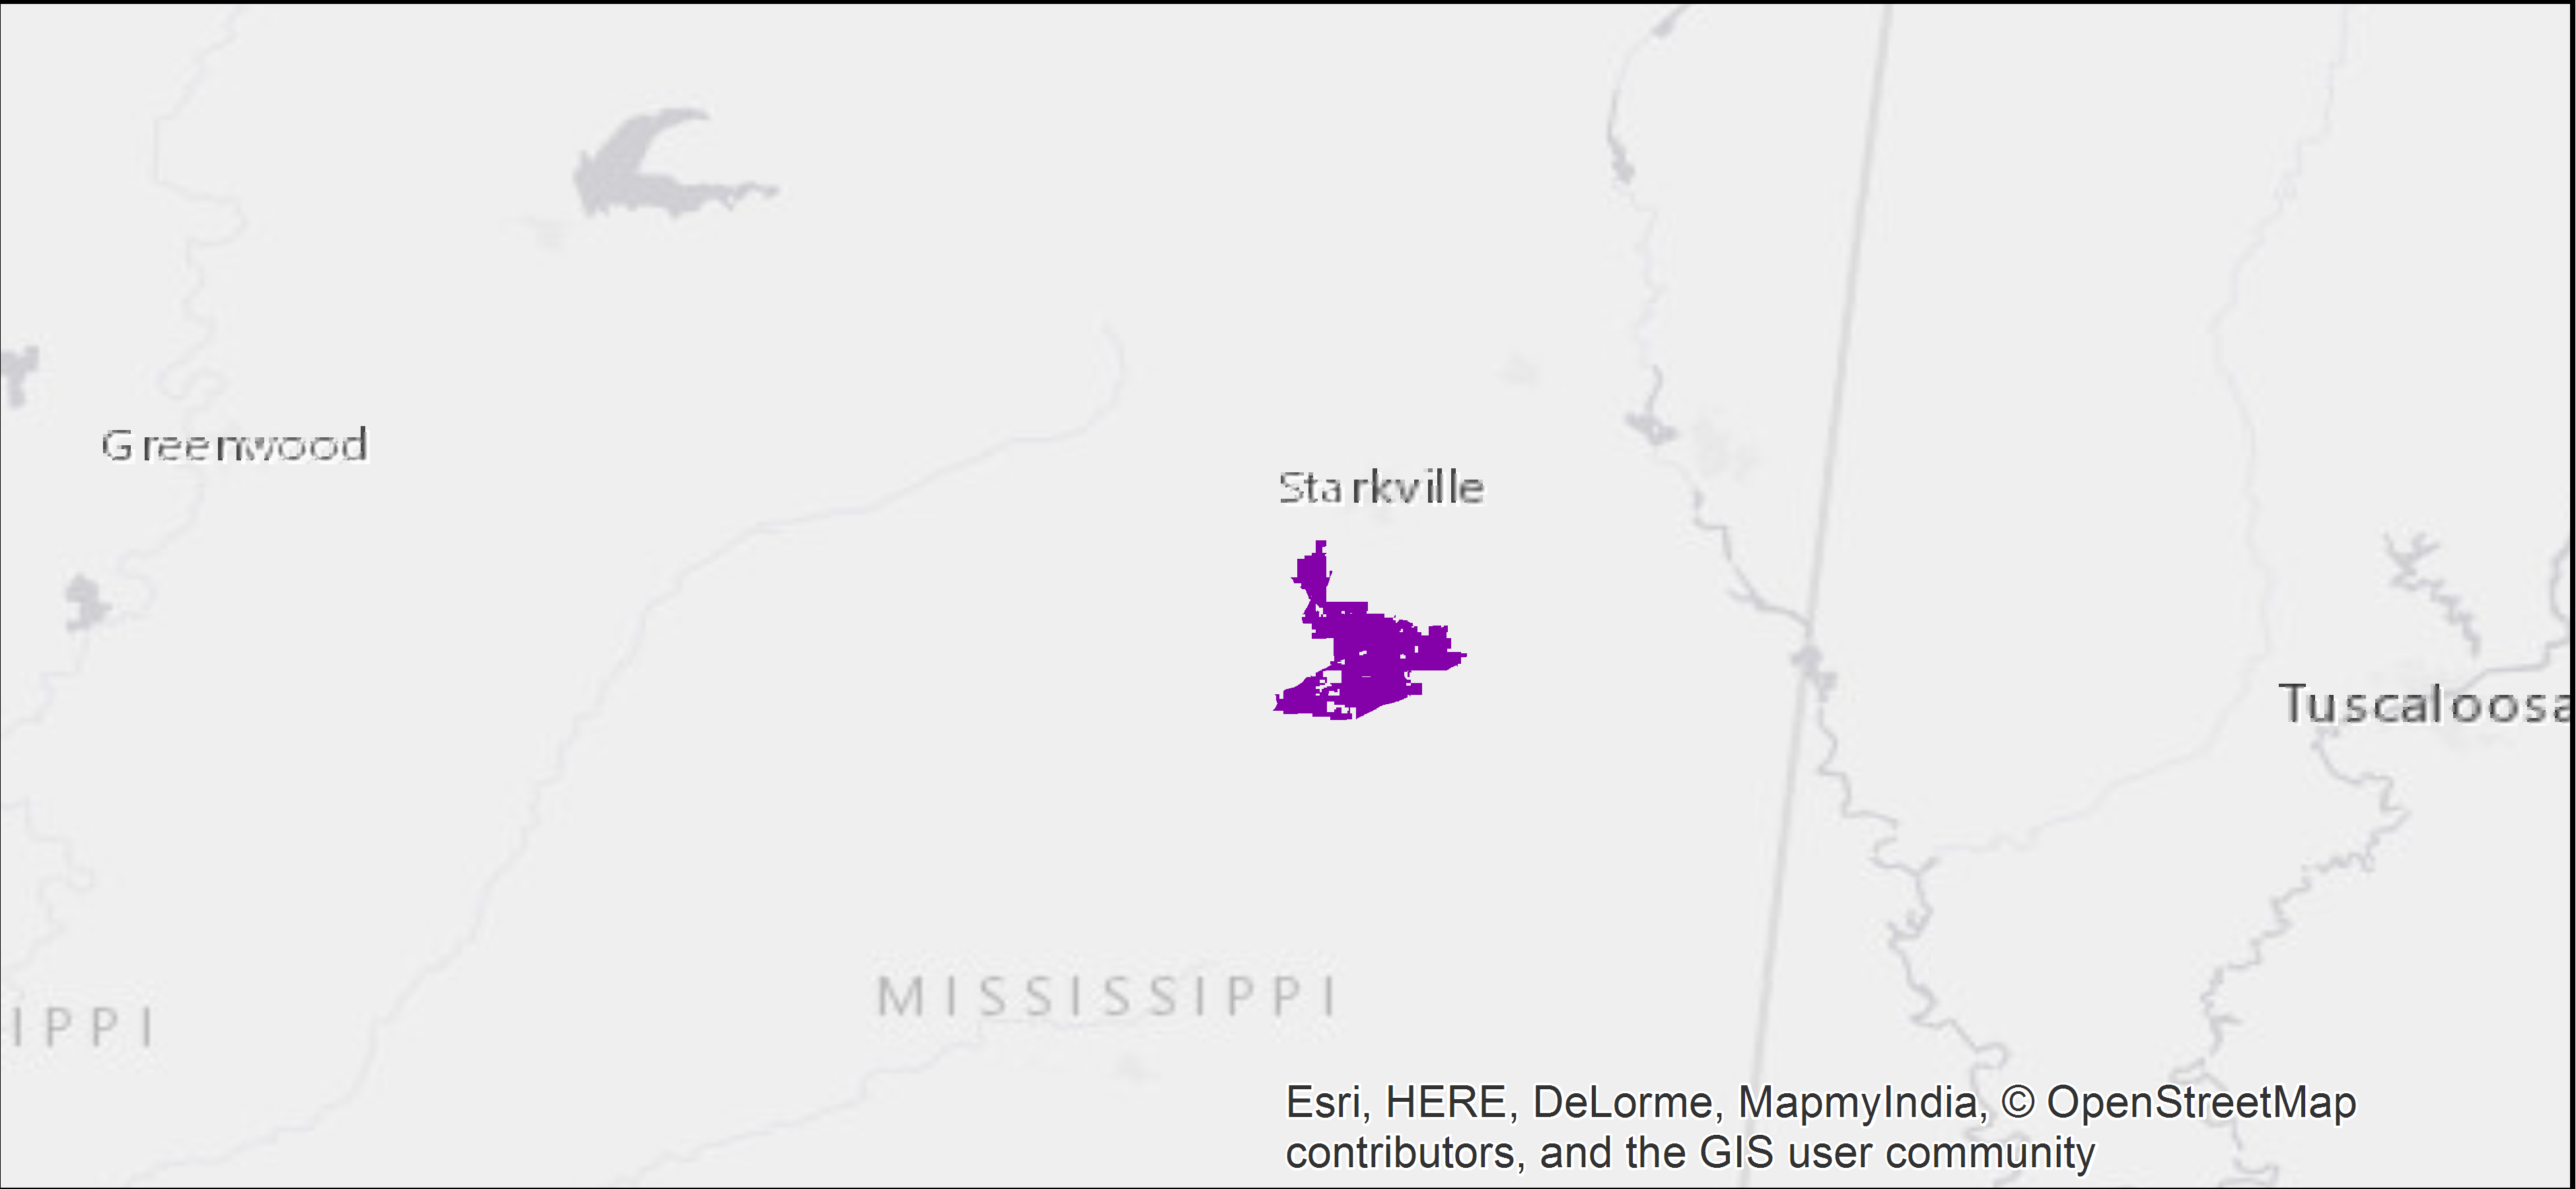

In [8]:
aoi = "T:\SmallProjects\Refuge_lists\Noxubee2.shp"
Image(filename='T:/SmallProjects/Refuge_lists/Noxubee.png')

## Species list
A function has already been written for this type of task.  It requires access to the GAP database, a 12 digit huc layer developed by GAP, and specification of desired range attributes.  

The GAP range data has 4 attributes:

'Origin': 
 {1: 'Native',
  2: 'Introduced',
  3: 'Either introducted or native',
  4: 'Reintroduced',
  5: 'Either introduced or reintroduced',
  6: 'Vagrant',
  7: 'Unknown'},
 
 'Presence': 
 {1: 'Known/extant',
  2: 'Possibly present',
  3: 'Potential for presence',
  4: 'Extirpated/historical presence',
  5: 'Extirpated purposely (applies to introduced species only)',
  6: 'Occurs on indicated island chain',
  7: 'Unknown'},
 
 'Reproduction': 
 {1: 'Breeding',
  2: 'Nonbreeding',
  3: 'Both breeding and nonbreeding',
  7: 'Unknown'},
 
 'Season': 
 {1: 'Year-round',
  2: 'Migratory',
  3: 'Winter',
  4: 'Summer',
  5: 'Passage migrant or wanderer',
  6: 'Seasonal permanence uncertain',
  7: 'Unknown',
  8: 'Vagrant'}  

In [9]:
species = gp.gaprange.SppInAOI(AOIShp=aoi,
                               hucShp=config.hucs,
                               workDir="T:/SmallProjects/Refuge_lists/",
                               origin=[1,2],
                               season=[1,3,4],
                               reproduction=[1,2,3],
                               presence=[1])


Selecting HUCs that intersect with the AOI shapefile

Comparing species ranges to selected HUCs



## Results
Results are printed here and saved to csv file.

In [10]:
print("There are {0} species in the area of interest\n\n".format(len(species)))
df = pd.DataFrame(index=species)
df.index.name="gap_code"
df["scientific_name"] = [gp.gapdb.NameSci(x) for x in df.index]
df["common_name"] = [gp.gapdb.NameCommon(x) for x in df.index]
# save file
df.to_csv("T:/SmallProjects/Refuge_lists/Sam_D_Hamilton_Noxubee_NWR_species_6Sep2018.csv")
print(df)

There are 307 species in the area of interest


                       scientific_name                    common_name
gap_code                                                             
bAMCRx           Corvus brachyrhynchos                  American Crow
bAMKEx                Falco sparverius               American Kestrel
bAMREx             Setophaga ruticilla              American Redstart
bAWPEx       Pelecanus erythrorhynchos         American White Pelican
bBEKIx               Megaceryle alcyon              Belted Kingfisher
bBHCOx                  Molothrus ater           Brown-headed Cowbird
bBRTHx                 Toxostoma rufum                 Brown Thrasher
bBWHAx               Buteo platypterus              Broad-winged Hawk
bCAEGx                   Bubulcus ibis                   Cattle Egret
bCLSWx        Petrochelidon pyrrhonota                  Cliff Swallow
bDEJUx                  Junco hyemalis                Dark-eyed Junco
bFISPx                Spizella pusilla    